In [1]:
import pandas as pd
import julian
import datetime
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

In [2]:
header_names =['Site', 'MJD','AH','AW','ZHD','ZWD','PRESS','TEMP','WVP']
data = pd.read_csv('ANKR.dat', sep="\s+",header=None,skiprows=1,names=header_names)
data['ZTD'] = data['ZHD'] + data['ZWD']
data = data[['Site', 'MJD','AH','AW','ZHD','ZWD','ZTD','PRESS','TEMP','WVP']]



data

,Site,MJD,AH,AW,ZHD,ZWD,ZTD,PRESS,TEMP,WVP
0,ANKR,54466.25,0.001196,0.000615,2.0760,0.0298,2.1058,909.77,-2.82,3.01
1,ANKR,54466.50,0.001195,0.000556,2.0681,0.0300,2.0981,906.57,0.94,2.58
2,ANKR,54466.75,0.001195,0.000444,2.0694,0.0299,2.0993,907.12,-0.36,2.72
3,ANKR,54467.00,0.001195,0.000429,2.0676,0.0322,2.0998,906.30,-1.67,2.53
4,ANKR,54467.25,0.001196,0.000621,2.0673,0.0495,2.1168,906.37,-1.51,2.47
...,...,...,...,...,...,...,...,...,...,...
16066,ANKR,58482.75,0.001189,0.000507,2.0808,0.0453,2.1261,912.31,-1.26,4.12
16067,ANKR,58483.00,0.001186,0.000498,2.0796,0.0434,2.1230,912.15,-1.87,4.06
16068,ANKR,58483.25,0.001186,0.000438,2.0816,0.0375,2.1191,912.70,-2.78,4.04
16069,ANKR,58483.50,0.001186,0.000543,2.0802,0.0403,2.1205,912.38,-1.25,3.97


In [3]:
data['MJD'] = data['MJD'].apply(lambda x: float(x))

print(data.dtypes)

Site      object
MJD      float64
AH       float64
AW       float64
ZHD      float64
ZWD      float64
ZTD      float64
PRESS    float64
TEMP     float64
WVP      float64
dtype: object


In [4]:
date = data['MJD']
ndate = []
for i in range(len(date)):
    a = julian.from_jd(date[i], fmt='MJD')
    ndate.append(a)

ndate

data['MJD'] = ndate
data.columns = ['Site', 'DATE','AH','AW','ZHD','ZWD','ZTD','PRESS','TEMP','WVP']
data


,Site,DATE,AH,AW,ZHD,ZWD,ZTD,PRESS,TEMP,WVP
0,ANKR,2008-01-01 06:00:00,0.001196,0.000615,2.0760,0.0298,2.1058,909.77,-2.82,3.01
1,ANKR,2008-01-01 12:00:00,0.001195,0.000556,2.0681,0.0300,2.0981,906.57,0.94,2.58
2,ANKR,2008-01-01 18:00:00,0.001195,0.000444,2.0694,0.0299,2.0993,907.12,-0.36,2.72
3,ANKR,2008-01-02 00:00:00,0.001195,0.000429,2.0676,0.0322,2.0998,906.30,-1.67,2.53
4,ANKR,2008-01-02 06:00:00,0.001196,0.000621,2.0673,0.0495,2.1168,906.37,-1.51,2.47
...,...,...,...,...,...,...,...,...,...,...
16066,ANKR,2018-12-30 18:00:00,0.001189,0.000507,2.0808,0.0453,2.1261,912.31,-1.26,4.12
16067,ANKR,2018-12-31 00:00:00,0.001186,0.000498,2.0796,0.0434,2.1230,912.15,-1.87,4.06
16068,ANKR,2018-12-31 06:00:00,0.001186,0.000438,2.0816,0.0375,2.1191,912.70,-2.78,4.04
16069,ANKR,2018-12-31 12:00:00,0.001186,0.000543,2.0802,0.0403,2.1205,912.38,-1.25,3.97


In [5]:
data['DATE']

0       2008-01-01 06:00:00
1       2008-01-01 12:00:00
2       2008-01-01 18:00:00
3       2008-01-02 00:00:00
4       2008-01-02 06:00:00
                ...        
16066   2018-12-30 18:00:00
16067   2018-12-31 00:00:00
16068   2018-12-31 06:00:00
16069   2018-12-31 12:00:00
16070   2018-12-31 18:00:00
Name: DATE, Length: 16071, dtype: datetime64[ns]

In [6]:
datelist = list(data['DATE'])
datelist = [dt.datetime.strptime(str(date), '%Y-%m-%d %X').date() for date in datelist]

print('SHAPE =={}'.format(data.shape))
print('ALL TİME == {}'.format(len(datelist)))

SHAPE ==(16071, 10)
ALL TİME == 16071


In [7]:
data = data.set_index('DATE')

In [8]:
data.index

DatetimeIndex(['2008-01-01 06:00:00', '2008-01-01 12:00:00',
               '2008-01-01 18:00:00', '2008-01-02 00:00:00',
               '2008-01-02 06:00:00', '2008-01-02 12:00:00',
               '2008-01-02 18:00:00', '2008-01-03 00:00:00',
               '2008-01-03 06:00:00', '2008-01-03 12:00:00',
               ...
               '2018-12-29 12:00:00', '2018-12-29 18:00:00',
               '2018-12-30 00:00:00', '2018-12-30 06:00:00',
               '2018-12-30 12:00:00', '2018-12-30 18:00:00',
               '2018-12-31 00:00:00', '2018-12-31 06:00:00',
               '2018-12-31 12:00:00', '2018-12-31 18:00:00'],
              dtype='datetime64[ns]', name='DATE', length=16071, freq=None)

In [9]:
data

,Site,AH,AW,ZHD,ZWD,ZTD,PRESS,TEMP,WVP
DATE,,,,,,,,,
2008-01-01 06:00:00,ANKR,0.001196,0.000615,2.0760,0.0298,2.1058,909.77,-2.82,3.01
2008-01-01 12:00:00,ANKR,0.001195,0.000556,2.0681,0.0300,2.0981,906.57,0.94,2.58
2008-01-01 18:00:00,ANKR,0.001195,0.000444,2.0694,0.0299,2.0993,907.12,-0.36,2.72
2008-01-02 00:00:00,ANKR,0.001195,0.000429,2.0676,0.0322,2.0998,906.30,-1.67,2.53
2008-01-02 06:00:00,ANKR,0.001196,0.000621,2.0673,0.0495,2.1168,906.37,-1.51,2.47
...,...,...,...,...,...,...,...,...,...
2018-12-30 18:00:00,ANKR,0.001189,0.000507,2.0808,0.0453,2.1261,912.31,-1.26,4.12
2018-12-31 00:00:00,ANKR,0.001186,0.000498,2.0796,0.0434,2.1230,912.15,-1.87,4.06
2018-12-31 06:00:00,ANKR,0.001186,0.000438,2.0816,0.0375,2.1191,912.70,-2.78,4.04


In [10]:
data.shape

(16071, 9)

<function matplotlib.pyplot.show(close=None, block=None)>

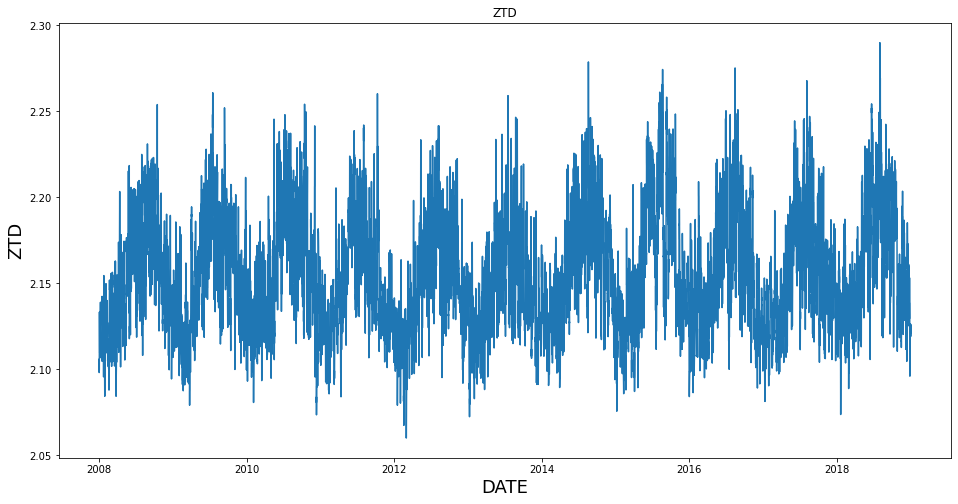

In [11]:
plt.figure(figsize=(16,8))
plt.title('ZTD')
plt.plot(data['ZTD'])
plt.xlabel('DATE', fontsize=18)
plt.ylabel('ZTD', fontsize=18)
plt.show

In [12]:
df = data.filter(['ZTD'])
dataset = df.values
training_data_len = math.ceil(len(dataset)* .7)

training_data_len

11250

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.19913043],
       [0.16565217],
       [0.17086957],
       ...,
       [0.25695652],
       [0.26304348],
       [0.27173913]])

In [14]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.19913043, 0.16565217, 0.17086957, 0.17304348, 0.24695652,
       0.27913043, 0.31869565, 0.29695652, 0.29956522, 0.25608696,
       0.21652174, 0.21521739, 0.21695652, 0.22869565, 0.25956522,
       0.28130435, 0.26434783, 0.28347826, 0.27043478, 0.28217391,
       0.2673913 , 0.26956522, 0.28782609, 0.31608696, 0.32478261,
       0.33086957, 0.34347826, 0.25826087, 0.24826087, 0.20347826,
       0.22782609, 0.26130435, 0.26173913, 0.24173913, 0.25043478,
       0.26217391, 0.25130435, 0.23565217, 0.2273913 , 0.22695652,
       0.22695652, 0.20782609, 0.21130435, 0.21956522, 0.23043478,
       0.22695652, 0.24695652, 0.23043478, 0.22913043, 0.21043478,
       0.21826087, 0.21565217, 0.22434783, 0.21695652, 0.21652174,
       0.20826087, 0.19478261, 0.19434783, 0.35826087, 0.33      ])]
[0.32260869565217476]

[array([0.19913043, 0.16565217, 0.17086957, 0.17304348, 0.24695652,
       0.27913043, 0.31869565, 0.29695652, 0.29956522, 0.25608696,
       0.21652174, 0.21521739, 0.21

In [15]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train,( x_train.shape[0],x_train.shape[1],1))
x_train.shape

(11190, 60, 1)

In [17]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam',loss='mse')

In [19]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
11190/11190 [==============================] - 195s 16ms/step - loss: 0.0050
Epoch 2/10
11190/11190 [==============================] - 178s 16ms/step - loss: 0.0031
Epoch 3/10
11190/11190 [==============================] - 178s 16ms/step - loss: 0.0029
Epoch 4/10
11190/11190 [==============================] - 179s 16ms/step - loss: 0.0028
Epoch 5/10
11190/11190 [==============================] - 190s 17ms/step - loss: 0.0028
Epoch 6/10
11190/11190 [==============================] - 205s 18ms/step - loss: 0.0026
Epoch 7/10
11190/11190 [==============================] - 244s 22ms/step - loss: 0.0026
Epoch 8/10
11190/11190 [==============================] - 241s 22ms/step - loss: 0.0026
Epoch 9/10
11190/11190 [==============================] - 184s 16ms/step - loss: 0.0026
Epoch 10/10
11190/11190 [==============================] - 190s 17ms/step - loss: 0.0026


In [20]:
test_data = scaled_data[training_data_len-60:, :]

x_test= []
y_test= dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

In [21]:
x_test = np.array(x_test)

In [22]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.011630758029997072

<ipython-input-25-7dcb6499d4d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

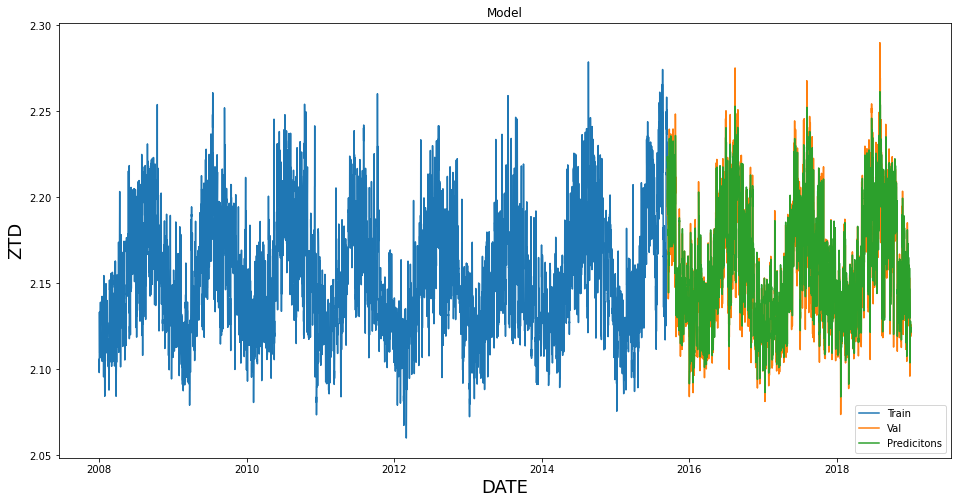

In [25]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('DATE', fontsize=18)
plt.ylabel('ZTD', fontsize=18)
plt.plot(train['ZTD'])
plt.plot(valid[['ZTD','Predictions']])
plt.legend(['Train','Val','Predicitons'], loc='lower right')
plt.show

In [26]:
n_future =60
n_past = 90
date_future = pd.date_range(datelist[-1], periods = n_future,  freq='6H').tolist()

date_future_=[]
for this_timestamp in date_future:
    date_future_.append(this_timestamp.date())


In [27]:
date_future

[Timestamp('2018-12-31 00:00:00', freq='6H'),
 Timestamp('2018-12-31 06:00:00', freq='6H'),
 Timestamp('2018-12-31 12:00:00', freq='6H'),
 Timestamp('2018-12-31 18:00:00', freq='6H'),
 Timestamp('2019-01-01 00:00:00', freq='6H'),
 Timestamp('2019-01-01 06:00:00', freq='6H'),
 Timestamp('2019-01-01 12:00:00', freq='6H'),
 Timestamp('2019-01-01 18:00:00', freq='6H'),
 Timestamp('2019-01-02 00:00:00', freq='6H'),
 Timestamp('2019-01-02 06:00:00', freq='6H'),
 Timestamp('2019-01-02 12:00:00', freq='6H'),
 Timestamp('2019-01-02 18:00:00', freq='6H'),
 Timestamp('2019-01-03 00:00:00', freq='6H'),
 Timestamp('2019-01-03 06:00:00', freq='6H'),
 Timestamp('2019-01-03 12:00:00', freq='6H'),
 Timestamp('2019-01-03 18:00:00', freq='6H'),
 Timestamp('2019-01-04 00:00:00', freq='6H'),
 Timestamp('2019-01-04 06:00:00', freq='6H'),
 Timestamp('2019-01-04 12:00:00', freq='6H'),
 Timestamp('2019-01-04 18:00:00', freq='6H'),
 Timestamp('2019-01-05 00:00:00', freq='6H'),
 Timestamp('2019-01-05 06:00:00', 

In [28]:
forecast =[]

predictions_future = model.predict(x_train[-n_future:])

predictions = model.predict(x_train[n_past:])


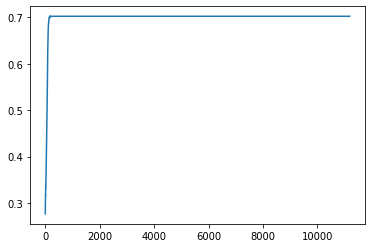

In [29]:
forecast =[]

fbatch = scaled_data[-n_future:]
sbatch = fbatch.reshape((1,n_future,1))

for i in range(len(y_train)):
    
    pred =model.predict(sbatch)[0]
    
    forecast.append(pred)
    
    sbatch = np.append(sbatch[:,1:,:],[[pred]],axis =1)

plt.plot(forecast)

In [30]:
data.index

DatetimeIndex(['2008-01-01 06:00:00', '2008-01-01 12:00:00',
               '2008-01-01 18:00:00', '2008-01-02 00:00:00',
               '2008-01-02 06:00:00', '2008-01-02 12:00:00',
               '2008-01-02 18:00:00', '2008-01-03 00:00:00',
               '2008-01-03 06:00:00', '2008-01-03 12:00:00',
               ...
               '2018-12-29 12:00:00', '2018-12-29 18:00:00',
               '2018-12-30 00:00:00', '2018-12-30 06:00:00',
               '2018-12-30 12:00:00', '2018-12-30 18:00:00',
               '2018-12-31 00:00:00', '2018-12-31 06:00:00',
               '2018-12-31 12:00:00', '2018-12-31 18:00:00'],
              dtype='datetime64[ns]', name='DATE', length=16071, freq=None)

In [31]:
def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d %X'), '%Y%m%d %X')


y_pred_future = scaler.inverse_transform(predictions_future)


PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['ZTD']).set_index(pd.Series(date_future))


In [32]:
PREDICTIONS_FUTURE

,ZTD
2018-12-31 00:00:00,2.167342
2018-12-31 06:00:00,2.183492
2018-12-31 12:00:00,2.173601
2018-12-31 18:00:00,2.178248
2019-01-01 00:00:00,2.176166
2019-01-01 06:00:00,2.148333
2019-01-01 12:00:00,2.176566
2019-01-01 18:00:00,2.175927
2019-01-02 00:00:00,2.152536
2019-01-02 06:00:00,2.154532


<function matplotlib.pyplot.show(close=None, block=None)>

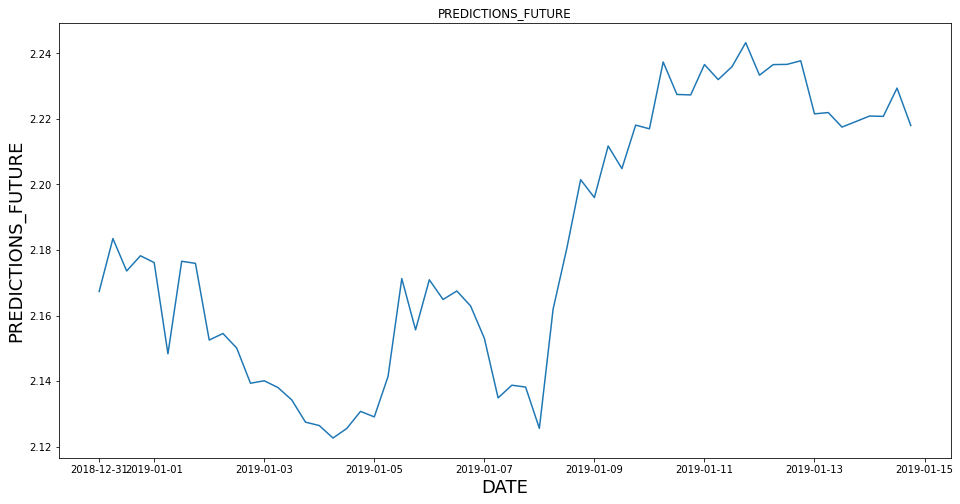

In [33]:
plt.figure(figsize=(16,8))
plt.title('PREDICTIONS_FUTURE')
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('DATE', fontsize=18)
plt.ylabel('PREDICTIONS_FUTURE', fontsize=18)
plt.show

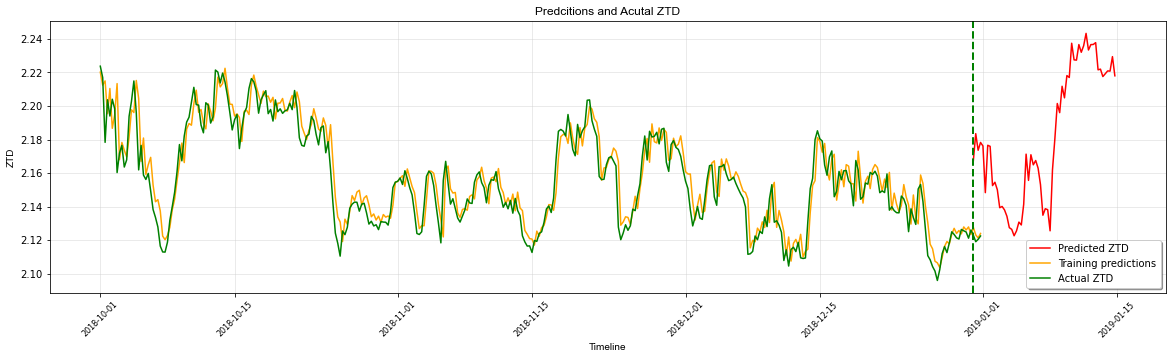

In [34]:
from pylab import rcParams

rcParams['figure.figsize'] = 20, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2018.10.01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['ZTD'], color='r', label='Predicted ZTD')
plt.plot(valid.loc[START_DATE_FOR_PLOTTING:].index, valid.loc[START_DATE_FOR_PLOTTING:]['Predictions'], color='orange', label='Training predictions')
plt.plot(data.loc[START_DATE_FOR_PLOTTING:].index, data.loc[START_DATE_FOR_PLOTTING:]['ZTD'], color='g', label='Actual ZTD')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal ZTD', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('ZTD', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [35]:
valid

,Site,AH,AW,ZHD,ZWD,ZTD,PRESS,TEMP,WVP,Predictions
DATE,,,,,,,,,,
2015-09-13 18:00:00,ANKR,0.001245,0.000571,2.0771,0.1393,2.2164,910.95,21.18,12.89,2.221307
2015-09-14 00:00:00,ANKR,0.001244,0.000579,2.0796,0.1339,2.2135,912.10,18.17,14.73,2.223808
2015-09-14 06:00:00,ANKR,0.001242,0.000490,2.0811,0.1262,2.2073,912.96,18.08,15.29,2.216158
2015-09-14 12:00:00,ANKR,0.001249,0.000503,2.0770,0.1134,2.1904,910.73,25.13,11.65,2.205626
2015-09-14 18:00:00,ANKR,0.001247,0.000504,2.0760,0.1131,2.1891,910.55,24.09,11.01,2.194295
...,...,...,...,...,...,...,...,...,...,...
2018-12-30 18:00:00,ANKR,0.001189,0.000507,2.0808,0.0453,2.1261,912.31,-1.26,4.12,2.123352
2018-12-31 00:00:00,ANKR,0.001186,0.000498,2.0796,0.0434,2.1230,912.15,-1.87,4.06,2.127657
2018-12-31 06:00:00,ANKR,0.001186,0.000438,2.0816,0.0375,2.1191,912.70,-2.78,4.04,2.123166


In [36]:
from sklearn.metrics import  mean_squared_error
print(f" RMSE error: {np.sqrt(mean_squared_error(valid['ZTD'],valid['Predictions']))}")

 RMSE error: 0.011630758029997072


In [37]:
PREDICTIONS_FUTURE['ZTD']

2018-12-31 00:00:00    2.167342
2018-12-31 06:00:00    2.183492
2018-12-31 12:00:00    2.173601
2018-12-31 18:00:00    2.178248
2019-01-01 00:00:00    2.176166
2019-01-01 06:00:00    2.148333
2019-01-01 12:00:00    2.176566
2019-01-01 18:00:00    2.175927
2019-01-02 00:00:00    2.152536
2019-01-02 06:00:00    2.154532
2019-01-02 12:00:00    2.150082
2019-01-02 18:00:00    2.139358
2019-01-03 00:00:00    2.140106
2019-01-03 06:00:00    2.138037
2019-01-03 12:00:00    2.134264
2019-01-03 18:00:00    2.127483
2019-01-04 00:00:00    2.126450
2019-01-04 06:00:00    2.122637
2019-01-04 12:00:00    2.125554
2019-01-04 18:00:00    2.130769
2019-01-05 00:00:00    2.129086
2019-01-05 06:00:00    2.141418
2019-01-05 12:00:00    2.171286
2019-01-05 18:00:00    2.155642
2019-01-06 00:00:00    2.170921
2019-01-06 06:00:00    2.164912
2019-01-06 12:00:00    2.167492
2019-01-06 18:00:00    2.162936
2019-01-07 00:00:00    2.153077
2019-01-07 06:00:00    2.134886
2019-01-07 12:00:00    2.138752
2019-01-

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 25)                3225      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 201,395
Trainable params: 201,395
Non-trainable params: 0
_________________________________________________________________
